In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [202]:
#lets read the csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [203]:
#lets convert it to a DataFrame

Customer_Analysis=pd.DataFrame(data=df)
Customer_Analysis

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [204]:
Customer_Analysis.drop(["customerID","SeniorCitizen","PhoneService"],axis=1,inplace=True)

In [205]:
Customer_Analysis

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [206]:
Customer_Analysis.shape
#it has 7043 rows and 20 columns

(7043, 18)

In [207]:
Customer_Analysis.dtypes
#it has object,int and float data types

gender               object
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [208]:
#lets check for missig values if any

Customer_Analysis.isnull().sum()
#there seems to be no missing values

gender              0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

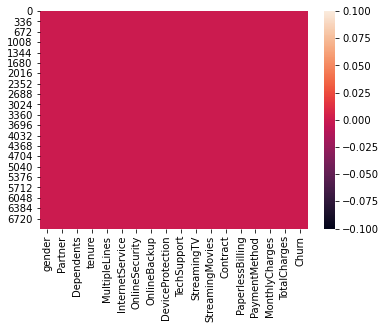

In [209]:
#lets confirm that there are no missing values using heatmap
sns.heatmap(Customer_Analysis.isnull())
#it is confirmed that there are no missing values

In [210]:
Customer_Analysis.TotalCharges.head(6756)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
6751    1025.05
6752      552.1
6753     3815.4
6754           
6755     3313.4
Name: TotalCharges, Length: 6756, dtype: object

In [211]:
Customer_Analysis.replace(" ",np.NaN,inplace=True)

In [212]:
Customer_Analysis.TotalCharges.head(490)

0        29.85
1       1889.5
2       108.15
3      1840.75
4       151.65
        ...   
485    6130.85
486       1415
487    6201.95
488        NaN
489      74.35
Name: TotalCharges, Length: 490, dtype: object

In [213]:
Customer_Analysis["TotalCharges"]=Customer_Analysis.TotalCharges.fillna(Customer_Analysis["TotalCharges"].mode()[0])

In [214]:
Customer_Analysis.TotalCharges.head(490)

0        29.85
1       1889.5
2       108.15
3      1840.75
4       151.65
        ...   
485    6130.85
486       1415
487    6201.95
488       20.2
489      74.35
Name: TotalCharges, Length: 490, dtype: object

In [215]:
#lets use label encoder to convert the objects to numeric

In [216]:
le1=LabelEncoder()
Customer_Analysis["gender"]=le1.fit_transform(Customer_Analysis["gender"])

le2=LabelEncoder()
Customer_Analysis["Partner"]=le2.fit_transform(Customer_Analysis["Partner"])


le3=LabelEncoder()
Customer_Analysis["Dependents"]=le3.fit_transform(Customer_Analysis["Dependents"])


#le4=LabelEncoder()
#Customer_Analysis["PhoneService"]=le4.fit_transform(Customer_Analysis["PhoneService"])


le5=LabelEncoder()
Customer_Analysis["MultipleLines"]=le5.fit_transform(Customer_Analysis["MultipleLines"])


le6=LabelEncoder()
Customer_Analysis["InternetService"]=le6.fit_transform(Customer_Analysis["InternetService"])


le7=LabelEncoder()
Customer_Analysis["OnlineSecurity"]=le7.fit_transform(Customer_Analysis["OnlineSecurity"])


le8=LabelEncoder()
Customer_Analysis["OnlineBackup"]=le8.fit_transform(Customer_Analysis["OnlineBackup"])


le9=LabelEncoder()
Customer_Analysis["DeviceProtection"]=le9.fit_transform(Customer_Analysis["DeviceProtection"])


le10=LabelEncoder()
Customer_Analysis["TechSupport"]=le10.fit_transform(Customer_Analysis["TechSupport"])

le11=LabelEncoder()
Customer_Analysis["StreamingTV"]=le11.fit_transform(Customer_Analysis["TechSupport"])

le12=LabelEncoder()
Customer_Analysis["StreamingMovies"]=le12.fit_transform(Customer_Analysis["StreamingMovies"])

le13=LabelEncoder()
Customer_Analysis["Contract"]=le13.fit_transform(Customer_Analysis["Contract"])

le14=LabelEncoder()
Customer_Analysis["PaperlessBilling"]=le14.fit_transform(Customer_Analysis["PaperlessBilling"])

le15=LabelEncoder()
Customer_Analysis["PaymentMethod"]=le15.fit_transform(Customer_Analysis["PaymentMethod"])

le16=LabelEncoder()
Customer_Analysis["Churn"]=le16.fit_transform(Customer_Analysis["Churn"])


In [217]:
#lets perform analysis

1    3555
0    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

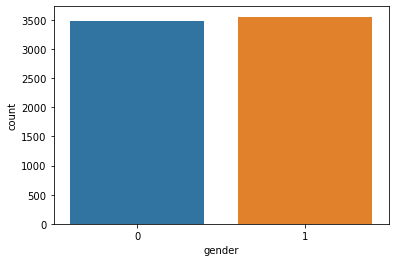

In [218]:
print(Customer_Analysis.gender.value_counts())
sns.countplot(Customer_Analysis["gender"])
#count of males are slightly more than that of females

In [219]:
#senior citizens deleted

0    3641
1    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

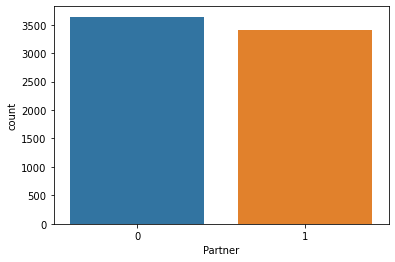

In [220]:
print(Customer_Analysis.Partner.value_counts())
sns.countplot(Customer_Analysis["Partner"])
#count of partners is less than the ones withouth partenrs

0    4933
1    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

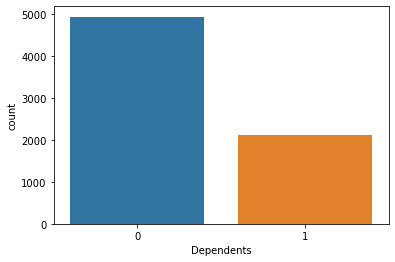

In [221]:
print(Customer_Analysis.Dependents.value_counts())
sns.countplot(Customer_Analysis["Dependents"])
#count dependednts is less than the ones without dependents

<AxesSubplot:xlabel='tenure'>

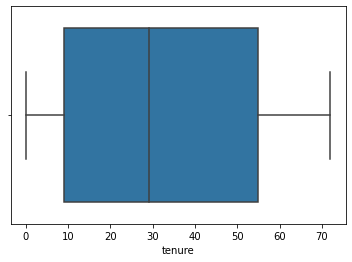

In [222]:
sns.boxplot(Customer_Analysis["tenure"])
#there are no outliers. The minimum value is 0, median is around 30 and maximum is around 70

<AxesSubplot:xlabel='tenure', ylabel='Density'>

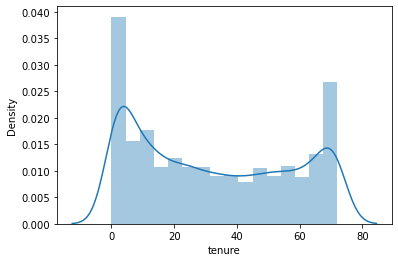

In [223]:
sns.distplot(Customer_Analysis["tenure"])
#there is skewness present to the right

In [224]:
#phone service deleted

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

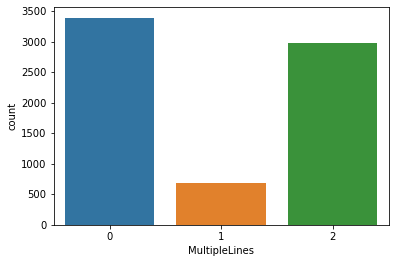

In [225]:
print(Customer_Analysis.MultipleLines.value_counts())
sns.countplot(Customer_Analysis["MultipleLines"])
#count of multiple lines is less than the ones have just one line and more than the ones not having any lines

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

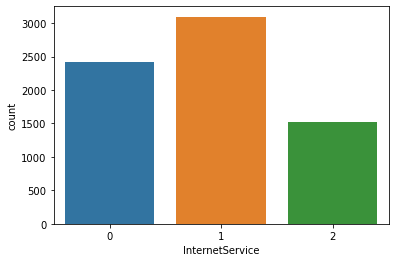

In [226]:
print(Customer_Analysis.InternetService.value_counts())
sns.countplot(Customer_Analysis["InternetService"])
#count of fiber optics is greater than DSl or no internet service

0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

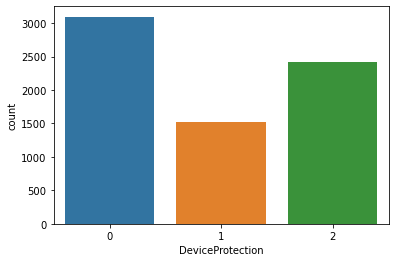

In [227]:
print(Customer_Analysis.DeviceProtection.value_counts())
sns.countplot(Customer_Analysis["DeviceProtection"])
#No device protection is the most in count.

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

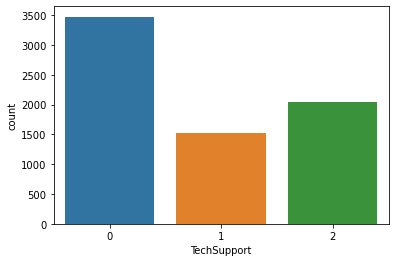

In [228]:
print(Customer_Analysis.TechSupport.value_counts())
sns.countplot(Customer_Analysis["TechSupport"])
#No tech support is the most in count.

0    3875
2    1695
1    1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

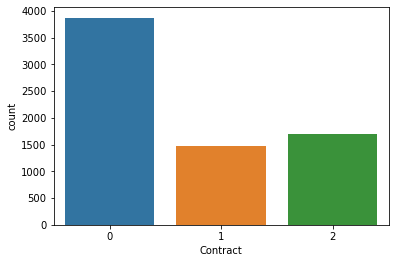

In [229]:
print(Customer_Analysis.Contract.value_counts())
sns.countplot(Customer_Analysis["Contract"])
#Month to month contract is the most in count.

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

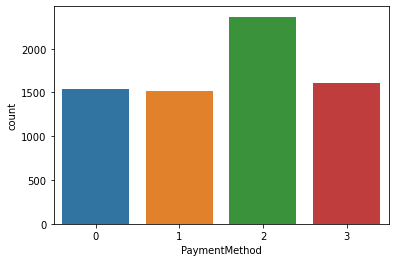

In [230]:
print(Customer_Analysis.PaymentMethod.value_counts())
sns.countplot(Customer_Analysis["PaymentMethod"])
#Electronic check is the most preferred way to make payments out of the other ways.

<AxesSubplot:xlabel='MonthlyCharges'>

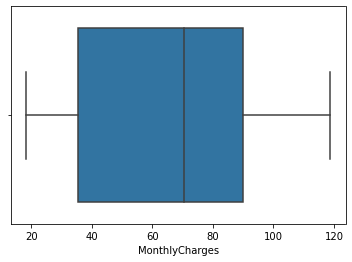

In [231]:
sns.boxplot(Customer_Analysis["MonthlyCharges"])
#no outliers are present. Minimum value is around 10, median is around 70 and maximum is around 120

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

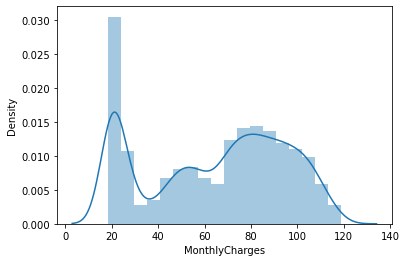

In [232]:
sns.distplot(Customer_Analysis["MonthlyCharges"])
#skewness is present to the right

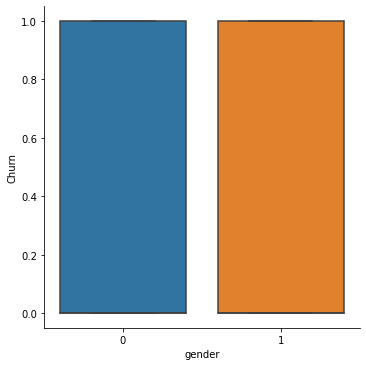

In [243]:
sns.catplot(x="gender",y="Churn",kind="box",data=Customer_Analysis)
#Churn is irrespetive of the gender

In [239]:
x=Customer_Analysis.drop("Churn",axis=1)
x

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,45,1,0,2,0,2,2,2,0,1,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5
7039,0,1,1,72,2,1,0,2,2,0,0,2,1,1,1,103.20,7362.9
7040,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6


In [253]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[-1.00955867,  1.03453023, -0.65401193, ...,  0.39855772,
        -1.16032292, -0.99263828],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.25962894, -0.17218103],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.36266036, -0.95809317],
       ...,
       [-1.00955867,  1.03453023,  1.5290241 , ...,  0.39855772,
        -1.1686319 , -0.85295782],
       [ 0.99053183,  1.03453023, -0.65401193, ...,  1.33486261,
         0.32033821, -0.8705392 ],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -1.47405205,
         1.35896134,  2.0139108 ]])

In [241]:
y=Customer_Analysis["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [256]:
smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

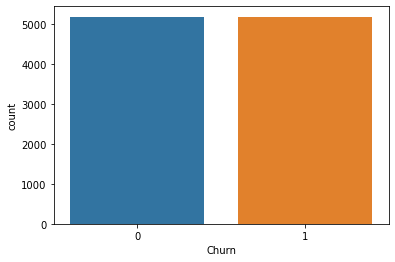

In [258]:
sns.countplot(ytrain)

In [259]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7243, 17)
(3105, 17)
(7243,)
(3105,)


In [260]:
#1) Logisticregression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict y values
pred1=lg.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(lg,xtrain,ytrain,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.7729468599033816
[[1146  428]
 [ 277 1254]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1574
           1       0.75      0.82      0.78      1531

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105

[0.76425121 0.75603865 0.76425121 0.76413726 0.780087  ]
0.7657530651461768
0.007835222059398069


In [261]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,xtrain,ytrain,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.7906602254428341
[[1091  167]
 [ 483 1364]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1258
           1       0.89      0.74      0.81      1847

    accuracy                           0.79      3105
   macro avg       0.79      0.80      0.79      3105
weighted avg       0.81      0.79      0.79      3105

[0.76763285 0.76859903 0.79710145 0.80618656 0.80473659]
0.7888512969228291
0.017212179335853214


In [262]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,xtrain,ytrain,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8489533011272141
[[1332  227]
 [ 242 1304]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1559
           1       0.85      0.84      0.85      1546

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

[0.78792271 0.7942029  0.88309179 0.89270179 0.89753504]
0.851090844138105
0.04927280505918211


In [263]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,xtrain,ytrain,scoring="f1",cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.821256038647343
[[1255  236]
 [ 319 1295]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1491
           1       0.85      0.80      0.82      1614

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105

[0.7557328  0.76383399 0.84079823 0.8442623  0.86008969]
0.8129434002069557
0.043964356784353203


In [264]:
# Random forest is the best fit model

In [265]:
parameters={"n_estimators":[100,10,120,50],"criterion":["gini","entropy"],"min_samples_leaf":[1,0.1,10,20],"bootstrap":[True,False],"random_state":[42,50,30,100]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 0.1, 10, 20],
                                        'n_estimators': [100, 10, 120, 50],
                                        'random_state': [42, 50, 30, 100]})

In [266]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=50)
{'random_state': 50, 'n_estimators': 50, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
0.8372229466692594


In [267]:
#lets put these best parameters back into the randomforest model

rf1=RandomForestClassifier(random_state=50,n_estimators=50,min_samples_leaf=1,criterion="entropy",bootstrap=True)
rf1.fit(x_train,y_train)
#lets predict y values
pred5=rf1.predict(x_test)
print(accuracy_score(pred5,y_test))
print(confusion_matrix(pred5,y_test))
print(classification_report(pred5,y_test))

0.8483091787439614
[[1339  236]
 [ 235 1295]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1575
           1       0.85      0.85      0.85      1530

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



In [268]:
y_pred_prob=rf1.predict_proba(x_test)[:,1]
y_pred_prob

array([0.94, 0.32, 0.22, ..., 0.58, 0.72, 0.5 ])

In [269]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00444727 0.00444727 0.00571792 0.00762389 0.01207116
 0.01207116 0.01651842 0.01715375 0.01715375 0.02096569 0.02096569
 0.02223634 0.02541296 0.03049555 0.03049555 0.03494282 0.03494282
 0.03875476 0.03939009 0.03939009 0.04320203 0.04320203 0.0501906
 0.05844981 0.05844981 0.05908513 0.06543837 0.0660737  0.07306226
 0.07306226 0.07687421 0.08322745 0.09212198 0.09212198 0.09720457
 0.0978399  0.10609911 0.10609911 0.1111817  0.11181703 0.12198221
 0.12198221 0.1270648  0.13532402 0.14930114 0.14930114 0.16200762
 0.16200762 0.17026684 0.17090216 0.18678526 0.18805591 0.20838628
 0.20838628 0.21855146 0.23506989 0.23570521 0.26111817 0.26238882
 0.27763659 0.29542567 0.31321474 0.33418043 0.36277001 0.39072427
 0.40787802 0.40851334 0.42947903 0.42947903 0.45425667 0.47966963
 0.48030496 0.51461245 0.51461245 0.54193139 0.5819568  0.58259212
 0.62770013 0.67407878 0.73506989 0.83036849 1.        ]
[0.         0.09928152 0.09993468 0.16525147 0.22403658 0.2743305
 0.2749

Text(0.5, 1.0, 'Random Forest')

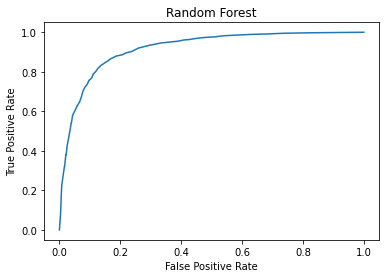

In [270]:
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")

In [271]:
#lets searlise and dump it for further use
joblib.dump(rf1,"rf1.obj")

['rf1.obj']